In [8]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [12]:
HSI = pd.read_csv('/content/drive/MyDrive/CBSA22(Elaine)/HSI Index.csv')
HSI

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-10,28665.140625,28665.140625,28504.269531,28638.199219,28638.199219,1448401000
1,2020-01-13,28772.369141,28971.400391,28671.839844,28954.939453,28954.939453,1765055700
2,2020-01-14,29149.529297,29149.529297,28790.490234,28885.140625,28885.140625,1643504700
3,2020-01-15,28891.070313,28972.679688,28619.099609,28773.589844,28773.589844,1240120700
4,2020-01-16,28806.119141,28987.730469,28709.570313,28883.039063,28883.039063,1620926200
...,...,...,...,...,...,...,...
730,2022-12-22,19537.449219,19735.000000,19475.679688,19679.220703,19679.220703,1939795100
731,2022-12-23,19382.230469,19686.769531,19380.470703,19593.060547,19593.060547,1363741800
732,2022-12-28,19787.939453,20099.769531,19787.939453,19898.910156,19898.910156,2823780600
733,2022-12-29,19648.400391,19764.519531,19539.839844,19741.140625,19741.140625,2902362900


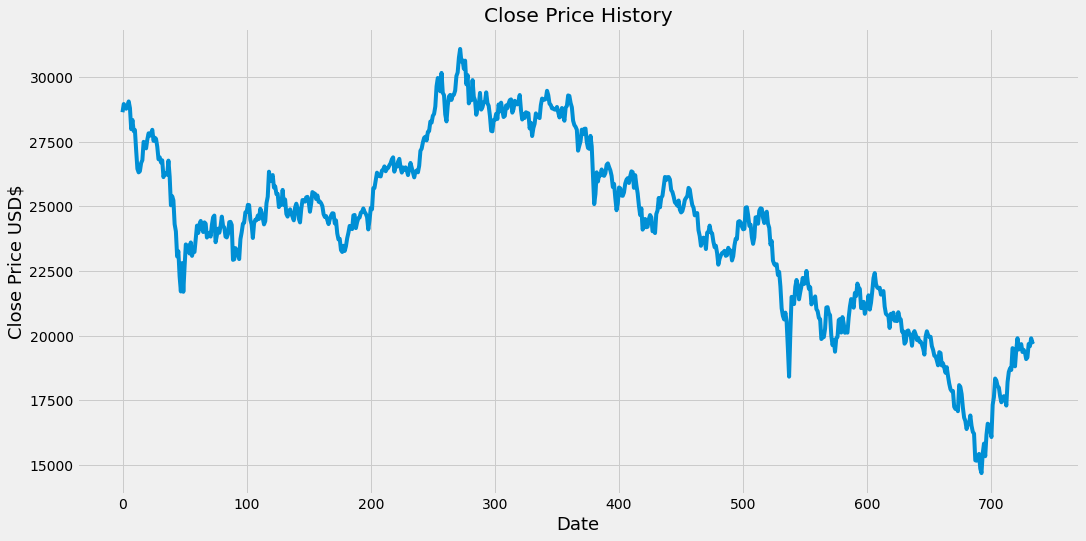

In [16]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(HSI['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD$',fontsize=18)
plt.show()

In [68]:
df = HSI.filter(['Close'])
#convert to np.array
dataset = df.values
training_data_len = math.ceil(len(df)*0.8)
training_data_len 

588

In [90]:
type(dataset)

numpy.ndarray

In [60]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.8507896 ],
       [0.87010548],
       [0.86584891],
       [0.85904617],
       [0.86572075],
       [0.87629409],
       [0.86040734],
       [0.81097545],
       [0.83266778],
       [0.80632786],
       [0.80879899],
       [0.76068254],
       [0.71729289],
       [0.70896866],
       [0.71167325],
       [0.73112694],
       [0.73788144],
       [0.78099416],
       [0.77554044],
       [0.76560444],
       [0.78649374],
       [0.80111628],
       [0.79540457],
       [0.80062472],
       [0.80940632],
       [0.78322005],
       [0.79088025],
       [0.78803535],
       [0.76971903],
       [0.73996345],
       [0.74437557],
       [0.73237769],
       [0.73738618],
       [0.69782693],
       [0.70769099],
       [0.70727268],
       [0.70344598],
       [0.73673061],
       [0.69884781],
       [0.63138748],
       [0.6528566 ],
       [0.64304436],
       [0.58678484],
       [0.56994367],
       [0.51083008],
       [0.52303652],
       [0.46376619],
       [0.428

In [ ]:
train_data = scaled_data[0:training_data_len,:]
train_data

In [62]:
#Create training dataset
train_data = scaled_data[0:training_data_len,:]
#split data to train and test sets
x_train = []
y_train = []

#append past 60 values to train set, y = 61st value #len(train_data)=588
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.8507896 , 0.87010548, 0.86584891, 0.85904617, 0.86572075,
       0.87629409, 0.86040734, 0.81097545, 0.83266778, 0.80632786,
       0.80879899, 0.76068254, 0.71729289, 0.70896866, 0.71167325,
       0.73112694, 0.73788144, 0.78099416, 0.77554044, 0.76560444,
       0.78649374, 0.80111628, 0.79540457, 0.80062472, 0.80940632,
       0.78322005, 0.79088025, 0.78803535, 0.76971903, 0.73996345,
       0.74437557, 0.73237769, 0.73738618, 0.69782693, 0.70769099,
       0.70727268, 0.70344598, 0.73673061, 0.69884781, 0.63138748,
       0.6528566 , 0.64304436, 0.58678484, 0.56994367, 0.51083008,
       0.52303652, 0.46376619, 0.42823183, 0.49506589, 0.42743905,
       0.48643186, 0.53910313, 0.52844021, 0.53648632, 0.51763211,
       0.54375561, 0.51218506, 0.52403238, 0.52135209, 0.55263714])]
[0.5833831106325609]



In [96]:
# convert x_train and y_train to np.arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [97]:
#Reshape the date
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(528, 60, 1)

In [98]:
#Build the LSTM model
from tensorflow.python.keras.layers.recurrent import LSTM

model_vanilla = Sequential([layers.LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)),
                            layers.LSTM(128,return_sequences=False,activation='relu'),
                            # only the output at the last step (the final hidden state) is fed into a fully-connected layer
                            layers.Dense(50,activation='relu'),
                            layers.Dense(1, activation='relu')], name="vanilla")


model_vanilla.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_vanilla.summary()


# model = Sequential()
# model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(LSTM(50,return_sequences=False))
# model.add(Dense(25))
# model.add(Dense(1))

Model: "vanilla"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60, 128)           66560     
                                                                 
 lstm_11 (LSTM)              (None, 128)               131584    
                                                                 
 dense_8 (Dense)             (None, 50)                6450      
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 204,645
Trainable params: 204,645
Non-trainable params: 0
_________________________________________________________________


In [99]:
model_vanilla.fit(x_train,y_train,batch_size=128,epochs=20)

Epoch 1/20
5/5 [==============================] - 7s 320ms/step - loss: 0.3743 - accuracy: 0.0000e+00
Epoch 2/20
5/5 [==============================] - 2s 318ms/step - loss: 0.0684 - accuracy: 0.0019
Epoch 3/20
5/5 [==============================] - 2s 309ms/step - loss: 0.0260 - accuracy: 0.0019
Epoch 4/20
5/5 [==============================] - 2s 323ms/step - loss: 0.0087 - accuracy: 0.0019
Epoch 5/20
5/5 [==============================] - 2s 314ms/step - loss: 0.0093 - accuracy: 0.0019
Epoch 6/20
5/5 [==============================] - 2s 313ms/step - loss: 0.0072 - accuracy: 0.0019
Epoch 7/20
5/5 [==============================] - 2s 320ms/step - loss: 0.0045 - accuracy: 0.0019
Epoch 8/20
5/5 [==============================] - 2s 314ms/step - loss: 0.0053 - accuracy: 0.0019
Epoch 9/20
5/5 [==============================] - 2s 329ms/step - loss: 0.0044 - accuracy: 0.0019
Epoch 10/20
5/5 [==============================] - 2s 318ms/step - loss: 0.0038 - accuracy: 0.0019
Epoch 11/20
5/5

In [75]:
#Create the test dataset
test_data = scaled_data[training_data_len-60:,:]
#Create x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [107]:
len(test_data)

207

In [100]:
test_data.shape

(207, 1)

In [102]:
dataset[training_data_len:,:]

(147, 1)

In [105]:
np.array(x_test).shape

(147, 60)

In [64]:
#convert data to numpy array
x_test = np.array(x_test)

x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#get the models predicted price values
predictions = model_vanilla.predict(x_test)
predictions = scaler.inverse_transform(predictions)


5/5 [==============================] - 0s 71ms/step


In [65]:
#Evaluation of model using RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

500.43926041326534

In [87]:
predictions.shape

(147, 1)

In [89]:
df[training_data_len:]

,Close
588,21294.939453
589,21082.130859
590,21653.900391
591,21531.669922
592,22014.589844
...,...
730,19679.220703
731,19593.060547
732,19898.910156
733,19741.140625


In [88]:
valid

,Close,Predictions
588,21294.939453,20673.091797
589,21082.130859,20753.197266
590,21653.900391,20829.685547
591,21531.669922,20922.636719
592,22014.589844,21017.476562
...,...,...
730,19679.220703,19671.832031
731,19593.060547,19699.382812
732,19898.910156,19727.859375
733,19741.140625,19767.294922


<ipython-input-67-18824b377e3d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"]= predictions


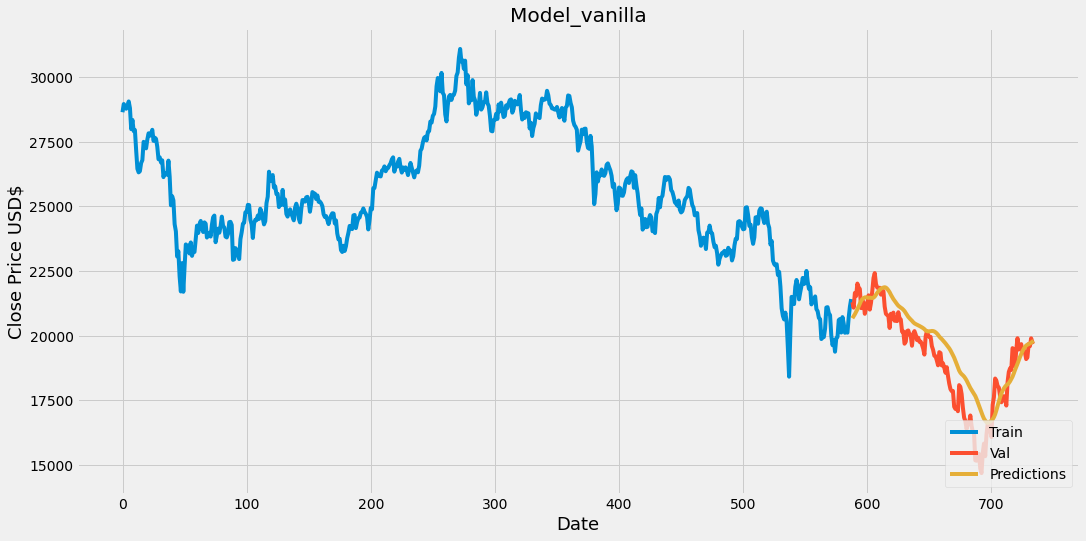

In [67]:
#Plot data
train = df[:training_data_len]
valid = df[training_data_len:]
valid["Predictions"]= predictions
#visualize
plt.figure(figsize=(16,8))
plt.title('Model_vanilla')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD$',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [69]:
#show the valid and predicted prices
valid

,Close,Predictions
588,21294.939453,20673.091797
589,21082.130859,20753.197266
590,21653.900391,20829.685547
591,21531.669922,20922.636719
592,22014.589844,21017.476562
...,...,...
730,19679.220703,19671.832031
731,19593.060547,19699.382812
732,19898.910156,19727.859375
733,19741.140625,19767.294922


In [ ]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
     x = []
     y = []
     start = start + window
     if end is None:
         end = len(dataset) - horizon
     for i in range(start, end):
         indices = range(i-window, i)
         x.append(dataset[indices])
         indicey = range(i+1, i+1+horizon)
         y.append(target[indicey])
     return np.array(x), np.array(y) 

hist_window = 60
horizon = 1
training_data_len = math.ceil(len(HSI["Close"])*0.8)

x_train, y_train = custom_ts_multi_data_prep(x_data, y_data, 0, training_data_len, hist_window, horizon)
x_vali, y_vali = custom_ts_multi_data_prep(x_data, y_data, training_data_len, None, hist_window, horizon) 

print('Multiple window of past history\n')
print(x_train[0])
print('\n Target horizon\n')
print(y_train[0]) 

In [ ]:
batch_size = 64
buffer_size = 10
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat(477)
val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat(73) 

#Build the LSTM model
from tensorflow.python.keras.layers.recurrent import LSTM
from tensorflow.keras import regularizers

model_senti = Sequential([layers.LSTM(128,return_sequences=True,input_shape=(x_train.shape[-2:])),
                            layers.Bidirectional(layers.LSTM(128,activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-4))),
                            # only the output at the last step (the final hidden state) is fed into a fully-connected layer
                            layers.Dense(50,activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-4)),
                            layers.Dense(1, activation='relu')], name="LSTMsenti")


model_senti.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_senti.summary()

history = model_senti.fit(train_data,epochs=20,steps_per_epoch=50,validation_data=val_data,verbose=1)

In [ ]:
y_test=HSI.filter(['Close']).values


x_val_data = x_scaler.fit_transform(HSI[related_columns].tail(194))

x_val=[]
y_test=y_test[training_data_len:,:]


pred=[]

for i in range(60,len(x_val_data)):
  x_val = x_val_data[i-60:i,:]
  x_val_scaled = np.array(x_val).reshape(1,np.array(x_val).shape[0], np.array(x_val).shape[1])
  print(x_val.shape)
  predict = model_senti.predict(x_val_scaled)
  pred.append(predict)

pred = np.array(pred).reshape(-1, 1)
pred_Inverse = y_scaler.inverse_transform(pred)

In [ ]:
y_test = np.array(HSI["Close"][training_data_len:]).reshape(len(y_data[training_data_len:]),)
rmse = np.sqrt(np.mean(pred_Inverse - y_test)**2)
rmse

In [ ]:
#Plot data
train = HSI["Close"][:training_data_len+1]

valid = pd.DataFrame(columns=["Close","Predictions"])
valid["Close"] = HSI["Close"][training_data_len:]
valid["Predictions"]= pred_Inverse

#visualize
plt.figure(figsize=(16,8))
plt.title('Model_senti')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD$',fontsize=18)
plt.plot(train)
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
valid